## Importing Required Libraries

In [61]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Importing Dataset

In [51]:
df =pd.read_csv("churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Removing First Column(as it is not used in the output)

In [5]:
df.drop(df.columns[0],axis=1,inplace=True)

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 13)

In [8]:
missing_values = df.isnull().sum()
missing_values

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df['Exited'] = df['Exited'].astype('category')


In [11]:
df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited             category
dtype: object

In [12]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


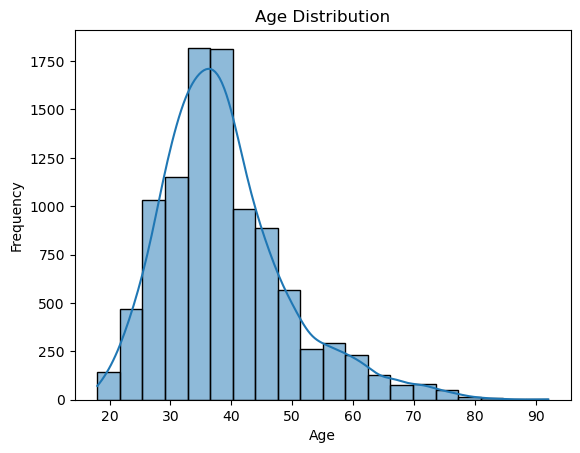

In [13]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


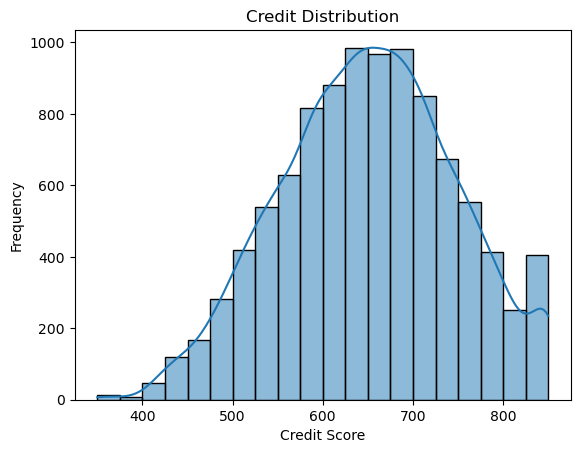

In [14]:
sns.histplot(df['CreditScore'], bins=20, kde=True)
plt.title('Credit Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


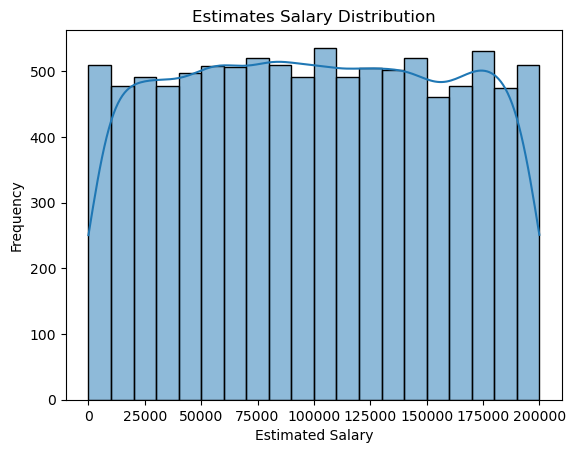

In [15]:
sns.histplot(df['EstimatedSalary'], bins=20, kde=True)
plt.title('Estimates Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


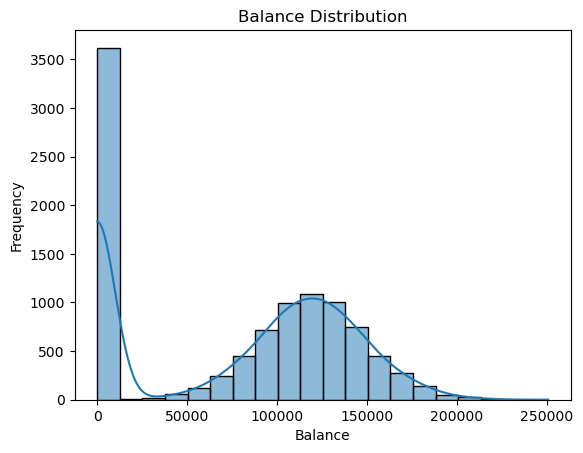

In [16]:
sns.histplot(df['Balance'], bins=20, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


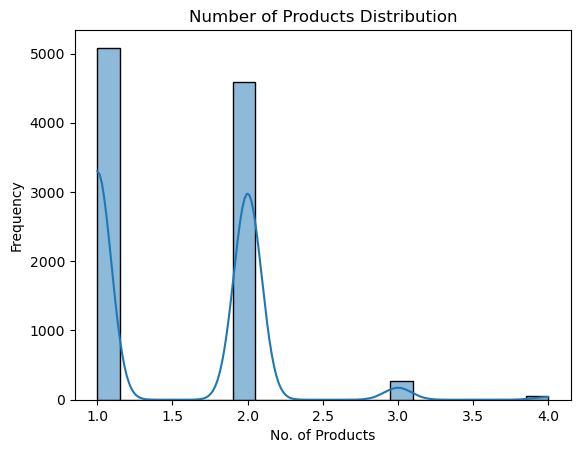

In [17]:
sns.histplot(df['NumOfProducts'], bins=20, kde=True)
plt.title('Number of Products Distribution')
plt.xlabel('No. of Products')
plt.ylabel('Frequency')
plt.show()

In [18]:
numerical_features = ['Balance', 'Age', 'CreditScore']

In [19]:
for feature in numerical_features:
    df[feature + '_log'] = np.log1p(df[feature])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


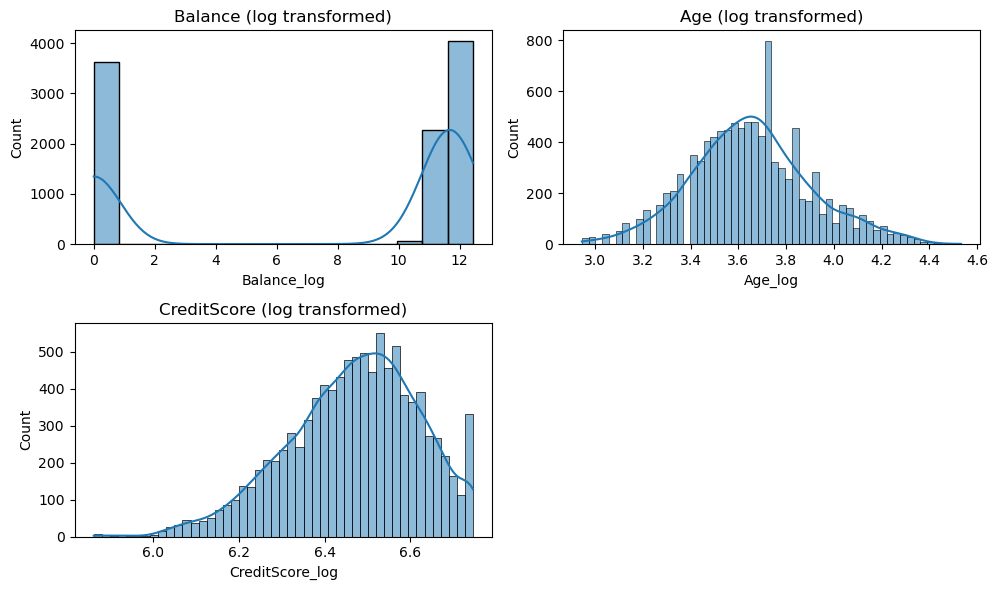

In [20]:
plt.figure(figsize=(10, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature + '_log'], kde=True)
    plt.title(f'{feature} (log transformed)')

plt.tight_layout()
plt.show()

In [21]:
churn_counts = df['Exited'].value_counts()
churn_proportions = churn_counts / len(df)

In [22]:
print('Churn Proportions:')
print(churn_proportions)

Churn Proportions:
Exited
0    0.7963
1    0.2037
Name: count, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


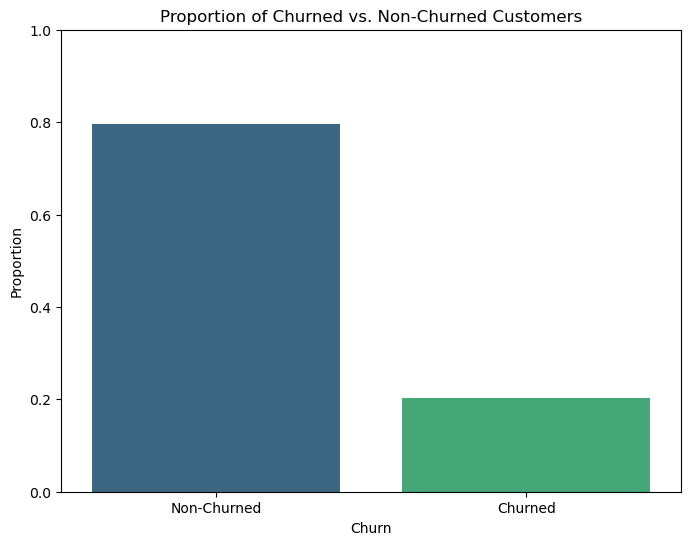

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette='viridis')
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])
plt.ylim(0, 1)
plt.show()

In [52]:
df= pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('Exited', axis=1)  # Replace 'Exited' with the actual target variable in your dataset
y = df['Exited']

Confusion Matrix:
[[1607    0]
 [ 393    0]]


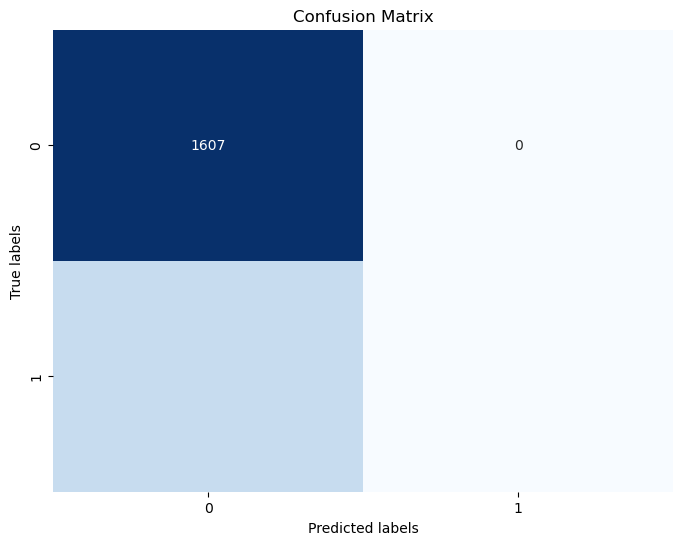

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate Model with Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

Confusion Matrix for KNN:
 [[1500  107]
 [ 359   34]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1607
           1       0.24      0.09      0.13       393

    accuracy                           0.77      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.77      0.72      2000



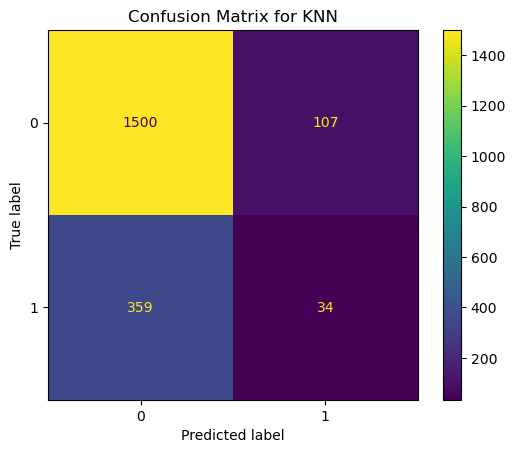

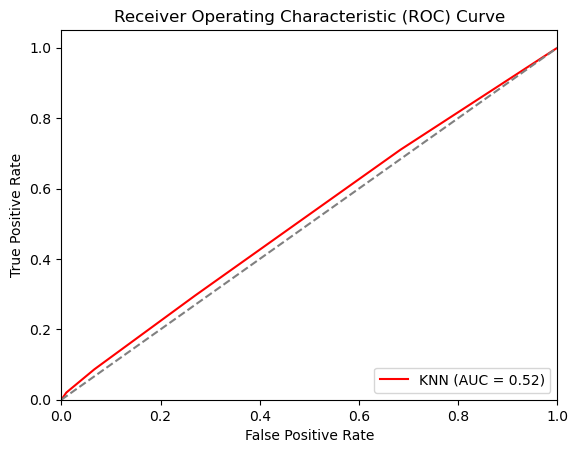

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

# Classification report
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix Display
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()
plt.title('Confusion Matrix for KNN')
plt.show()

# ROC Curve and AUC
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='red', label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix for KNN:
 [[1500  107]
 [ 359   34]]


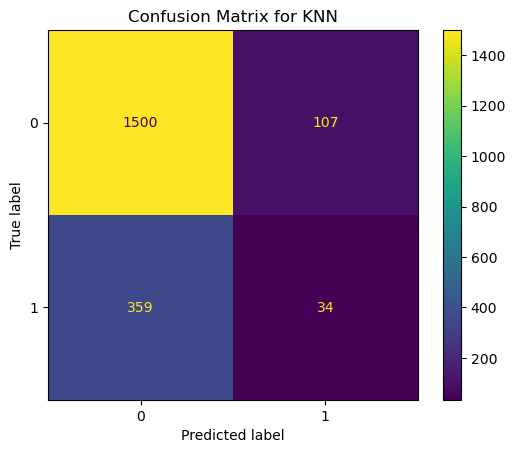

In [64]:
print("Confusion Matrix for KNN:\n", cm_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()
plt.title('Confusion Matrix for KNN')
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [67]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Confusion Matrix for Logistic Regression:
 [[1607    0]
 [ 393    0]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Confusion Matrix for KNN:
 [[1500  107]
 [ 359   34]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1607
           1       0.24      0.09      0.13       393

    accuracy                           0.77      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.77      0.72      2000



Confusion Matrix for KNN:
 [[1500  107]
 [ 359   34]]


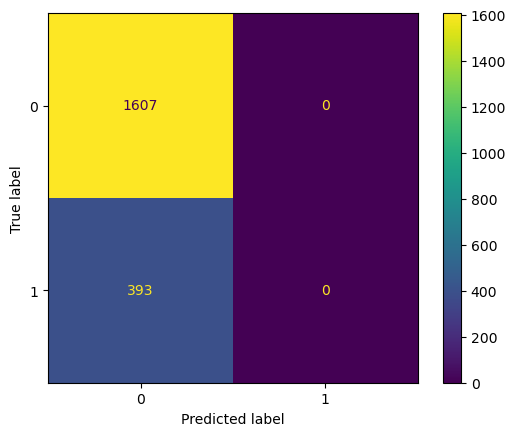

In [69]:
print("Confusion Matrix for KNN:\n", cm_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

In [70]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8035
Confusion Matrix:
 [[1607    0]
 [ 393    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


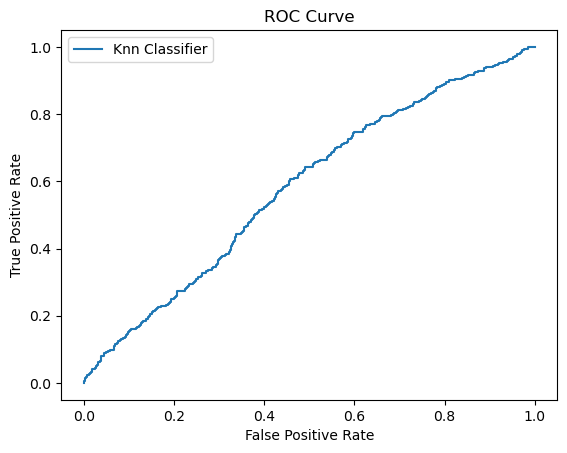

AUC Score: 0.5822158463845358


In [71]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Knn Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_prob))

In [72]:
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

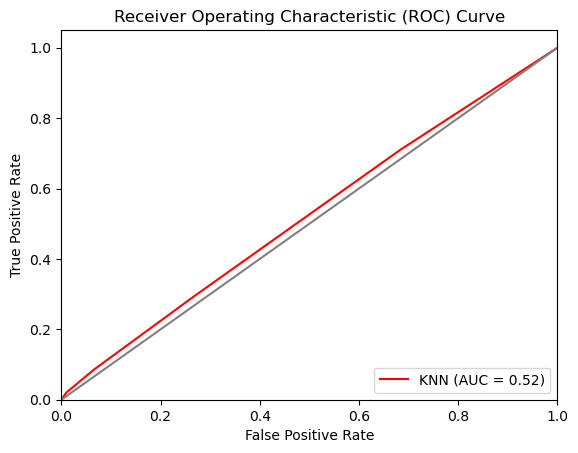

In [73]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='red', label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize the model
qda = QuadraticDiscriminantAnalysis()

# Train the model
qda.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [76]:
from sklearn.metrics import roc_curve, auc
y_prob_qda = qda.predict_proba(X_test)[:, 1]
conf_matrix_qda = confusion_matrix(y_test, y_prob_qda)
print("Confusion Matrix for QDA:")
print(conf_matrix_qda)

# Compute ROC curve and ROC area
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

Confusion Matrix for QDA:
[[1197  410]
 [ 291  102]]


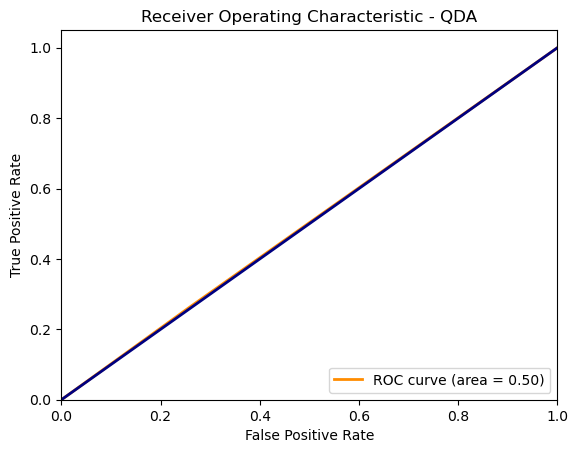

In [77]:
plt.figure()
plt.plot(fpr_qda, tpr_qda, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_qda)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - QDA')
plt.legend(loc="lower right")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion Matrix for QDA:
[[1197  410]
 [ 291  102]]


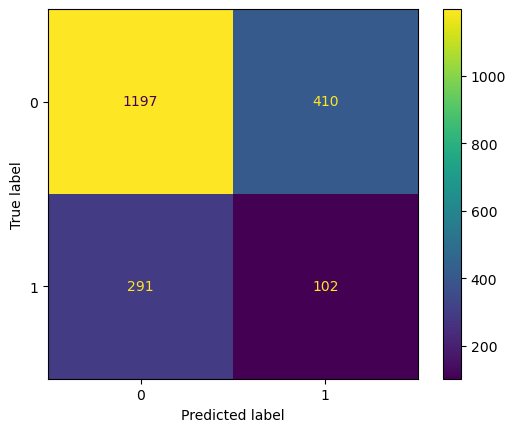

In [78]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Confusion Matrix for QDA
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix for QDA:")
print(conf_matrix_qda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_qda)
disp.plot()


In [81]:
# ROC Curve for QDA


/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion Matrix for QDA:
 [[1197  410]
 [ 291  102]]
AUC for QDA: 0.5022040975313158


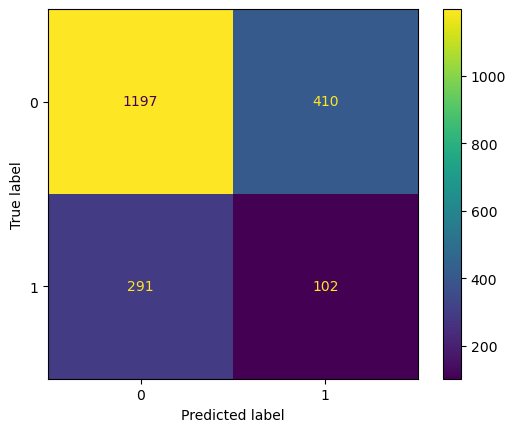

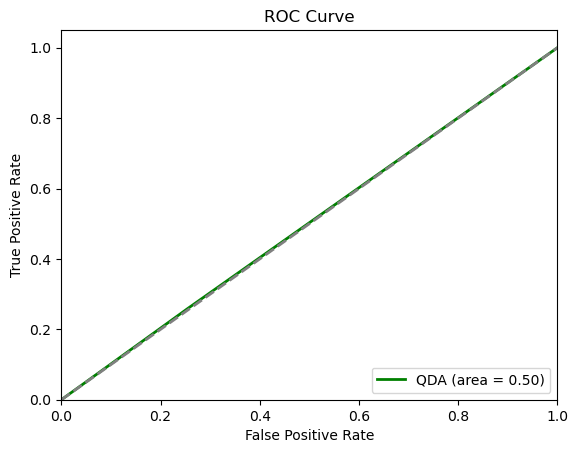

In [82]:
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
y_prob_qda = qda.predict_proba(X_test)[:, 1]

# Confusion Matrix for QDA
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix for QDA:\n", cm_qda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_qda)
disp.plot()

# ROC Curve for QDA
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
auc_qda = roc_auc_score(y_test, y_prob_qda)
print("AUC for QDA:", auc_qda)

# Plot ROC Curve for QDA
plt.figure()
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label='QDA (area = %0.2f)' % auc_qda)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot()


In [80]:
y_pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC for Rf:", auc_rf)

# Plot ROC Curve for QDA
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, label='Rf (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    return TPR, FPR

# Logistic Regression
TPR_log_reg, FPR_log_reg = calculate_tpr_fpr(y_test, y_pred_log_reg)
print(f"Logistic Regression - TPR: {TPR_log_reg}, FPR: {FPR_log_reg}")

# KNN Classifier
TPR_knn, FPR_knn = calculate_tpr_fpr(y_test, y_pred_knn)
print(f"KNN - TPR: {TPR_knn}, FPR: {FPR_knn}")

# QDA
TPR_qda, FPR_qda = calculate_tpr_fpr(y_test, y_pred_qda)
print(f"QDA - TPR: {TPR_qda}, FPR: {FPR_qda}")

# Random Forest
TPR_rf, FPR_rf = calculate_tpr_fpr(y_test, y_pred_rf)
print(f"Random Forest - TPR: {TPR_rf}, FPR: {FPR_rf}")

NameError: name 'y_test' is not defined

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [84]:
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
 [[1584   23]
 [ 265  128]]


Confusion Matrix for Random Forest:
[[1584   23]
 [ 265  128]]


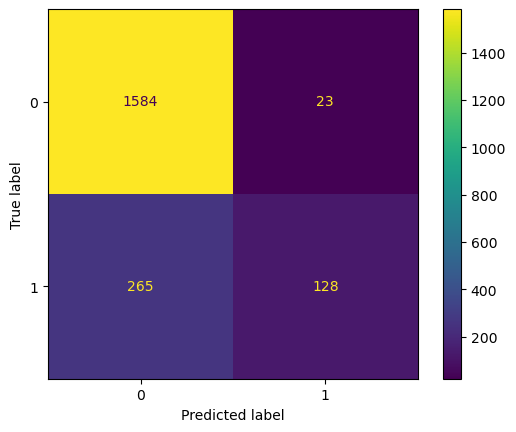

In [87]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot()

AUC for Rf: 0.6556936811120558


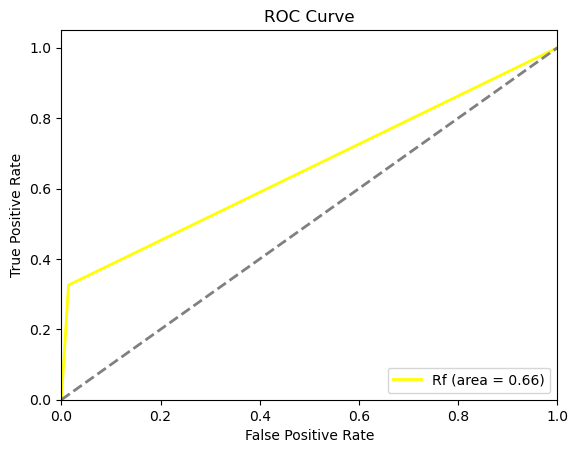

In [88]:
y_pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC for Rf:", auc_rf)

# Plot ROC Curve for QDA
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, label='Rf (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    return TPR, FPR

# Logistic Regression
TPR_log_reg, FPR_log_reg = calculate_tpr_fpr(y_test, y_pred_log_reg)
print(f"Logistic Regression - TPR: {TPR_log_reg}, FPR: {FPR_log_reg}")

# KNN Classifier
TPR_knn, FPR_knn = calculate_tpr_fpr(y_test, y_pred_knn)
print(f"KNN - TPR: {TPR_knn}, FPR: {FPR_knn}")

# QDA
TPR_qda, FPR_qda = calculate_tpr_fpr(y_test, y_pred_qda)
print(f"QDA - TPR: {TPR_qda}, FPR: {FPR_qda}")

# Random Forest
TPR_rf, FPR_rf = calculate_tpr_fpr(y_test, y_pred_rf)
print(f"Random Forest - TPR: {TPR_rf}, FPR: {FPR_rf}")

Logistic Regression - TPR: 0.0, FPR: 0.0
KNN - TPR: 0.08651399491094147, FPR: 0.06658369632856254
QDA - TPR: 0.2595419847328244, FPR: 0.2551337896701929
Random Forest - TPR: 0.3256997455470738, FPR: 0.01431238332296204
